In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.datasets import make_regression 

In [26]:
n_samples = 10000
n_outliers = 500

X, y, coef = make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0
)

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [27]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = ransac.predict(line_X)

print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
9.566664723066065 [9.52363266]


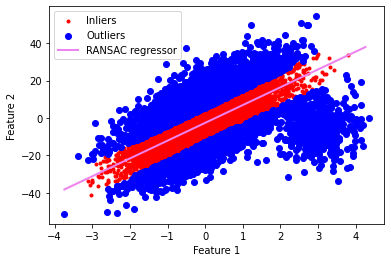

In [31]:
plt.figure()
plt.scatter(
    X[inlier_mask],
    y[inlier_mask],
    color='red',
    marker='.',
    label='Inliers'
)
plt.scatter(
    X[outlier_mask],
    y[outlier_mask],
    color='blue',
    marker='o',
    label='Outliers'
)
plt.plot(
    line_X,
    line_y,
    color='green',
    linewidth=2,
    label='RANSAC regressor'
)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()